# Matroids and Greedy algorithms

First we will start with a definition of a new discrete math entity, called a [matroid](https://en.wikipedia.org/wiki/Matroid).

Matroids are used in a subset of discrete optimization problems to find optimal subsets in **linear or polynomial time** (compare to travelling salesman, where time is exponential).

Matroid is defined like this:

$\large M = (E, I)$.
- $E$ is called a groud set. In this set we will be looking for an optimal subset.

![](img/matroid-e.png)

- $I$ - is a set of subsets of E with some magic property. Formally, $I \subset 2^E$. The property which we will describe later is called independece and $I$ itself is called a set of **independent sets**.

![](img/matroid-i.png)

## Independence property

Originally name of the property came from linear algebra, where it was reflecting linear independence of matrix rows ($\det A \neq 0$). Later it was generalized for other mathematical objects. And it was defined through the properties of the property :)

- $\emptyset$ is independent
- if $S$ is indepentent ($S\in I$), $\forall X \subset S$, $X$ is also independent ($X\in I$). Thus, independent sets are nested.
- Biggest independent sets are of the same size (and it is called a *rank*). This is expressed with the formula: $A, B\in I; |A|<|B|\implies \exists x\in B-A, A\cup{\{x\}}\in I$.

Thus, any property which we satisfies these conditions can be called "independence", and the problem, which involves this property will be automatically *defined on a matroid*. This is very important, as matroids are cool.

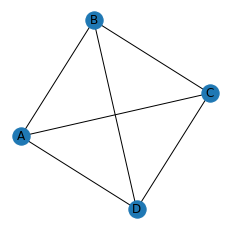

In [12]:
#  A set of edges is independent if and only if, 
# for every edge in the set, removing the edge would increase 
# the number of degrees of freedom of the remaining subgraph

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([
    "AB", "BC", "CD", "AD", "BD", "AC"
])
plt.figure(figsize=(3,3))
nx.draw(G, with_labels=True)
plt.show()

### Rigidity matroid and degrees of freedom

A system of $N$ points on a plane has $2N$ DoF, as we need $2*N$ numbers to describe coordinates of $N$ points. If we connect 2 of them with an edge, we need 1 number less: first point still need 2 numbers, but as edge length is known, we only need an angle to attach second node to the first. For a fully rigid graph we need only 1 pair of coordinates (let's say for a node $A$) and an angle - 3 numbers, also, 3 degrees of freedom.

Removing any egde from sample graph will not result in increasing *DOF*. But any 2 will do. Thus, biggest indepent sets are:
-  "BC", "CD", "AD", "BD", "AC"
-  "AB", "CD", "AD", "BD", "AC"
-  "AB", "BC", "AD", "BD", "AC"
-  "AB", "BC", "CD", "BD", "AC"
-  "AB", "BC", "CD", "AD", "AC"
-  "AB", "BC", "CD", "AD", "BD"

So, rephrasing the definition of indeendence:
- subgraph with no edges is independent.
- if subgraph $S$ having $N$ DoF by removing of any single edge will increase it's DoF, then any it's subsets has the same property.
- if one subgraph is "more flexible" then another, then you can always borrow an edge from less flexible to become more rigid.

E.g.

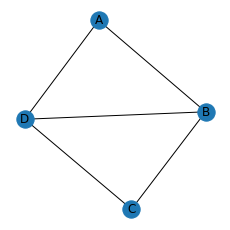

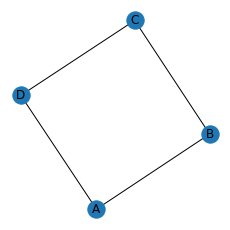

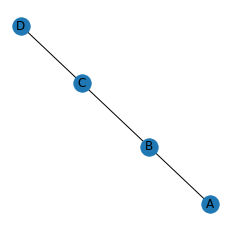

In [16]:
G1 = nx.Graph()
G1.add_edges_from(["AB", "BC", "CD", "AD", "BD"])
plt.figure(figsize=(3,3))
nx.draw(G1, with_labels=True)
plt.show()

G2 = nx.Graph()
G2.add_edges_from(["AB", "BC", "CD", "AD"])
plt.figure(figsize=(3,3))
nx.draw(G2, with_labels=True)
plt.show()

G3 = nx.Graph()
G3.add_edges_from(["AB", "BC", "CD"])
plt.figure(figsize=(3,3))
nx.draw(G3, with_labels=True)
plt.show()

## Terms

$X$ is a **dependent set**, if $X$ is a subset of $E$, but not in $I$.
- in our case $E$ itself is a dependent set.

Maximal independent set $M$ (means $M\cup\{x\}$ - dependent) is called **basis**.
- in our case any subset of 5 edges in a basis.

**Circuit** $C$ is a dependent set such that $\forall (C'\subset C) C'\in I$.
- in our case $E$ itself is a circuit.

# [Rado-Edmond's theorem](https://people.clas.ufl.edu/avince/files/Greedy.pdf)
```
Preparation:
Let’s assign weight w(x) to each x in E.
Then weight w(S) of S∈I is w(S) = Σw(x)
```

```
Theorem
If M = (E, I) is a matroid with a defined 
weight function w(S), then minimal (maximal)
basis can be obtained by the following algorithm
```
## Rado-Edmond's algorithm

```
Sorted_E = sort x in E by w(x) [asc for min|desc for max]
A = Ø
for i from 1 to |Sorted_E|:
  if A ∪ {Sorted_E[i]} ∈ I:   // this one is the most tricky
    A = A ∪ {Sorted_E[i]}     // include is still independent
return A
```

If we prove that some property $P(S)$ is a predicate for $I$, then we don't have to generate $I$, and algorithm converts to:

```
Sorted_E = sort x in E by w(x)
A = Ø
for i from 1 to |Sorted_E|:
  if P(A ∪ {Sorted_E[i]}): 
    A = A ∪ {Sorted_E[i]}  
  return A
```

Let's apply this to our problem.

```
Find a rigid structure with the minimal sum of lengths edges.
```

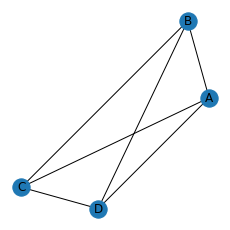

In [36]:
G = nx.Graph()
edges = [
    ("A", "B", 5), 
    ("B", "C", 15), 
    ("C", "D", 5), 
    ("A", "D", 10), 
    ("B", "D", 12.7),
    ("A", "C", 12.7),
]
G.add_weighted_edges_from(edges)
plt.figure(figsize=(3,3))
nx.draw_kamada_kawai(G, with_labels=True)
plt.show()

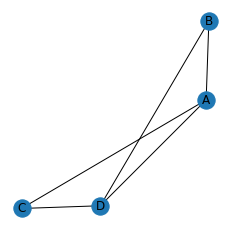

In [37]:
def P(nodes):
    return len(nodes) < 6

def RadoEdmonds(E):
    SE = sorted(E, key=lambda x: x[2])
    A = []
    for e in SE:
        if P(A + [e]):
            A = A + [e]
    return A

G1 = nx.Graph()
G1.add_weighted_edges_from(RadoEdmonds(edges))
plt.figure(figsize=(3,3))
nx.draw_kamada_kawai(G1, with_labels=True)
plt.show()

# Greedy method
1. Show that a problem model is a matroid (apply to definition)
2. This allows you to apply Rado-Edmonds theorem to your problem
3. Implement Rado-Edmonds greedy algorithm for your case as an optimal solution